In [449]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [450]:
pd.set_option("display.min_rows",500) 
pd.set_option("display.max_columns",500) 
pd.set_option("display.max_rows",500)

In [451]:
# Create dataframe from csv
loan_df = pd.read_csv("loan.csv") 

In [452]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [453]:
loan_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

#### we have 39717 rows & 111 columns

In [455]:
missing_value = np.round(loan_df.isnull().sum()/ len(loan_df) * 100)
missing_value.sort_values(ascending=False)

verification_status_joint         100.0
annual_inc_joint                  100.0
mo_sin_old_rev_tl_op              100.0
mo_sin_old_il_acct                100.0
bc_util                           100.0
bc_open_to_buy                    100.0
avg_cur_bal                       100.0
acc_open_past_24mths              100.0
inq_last_12m                      100.0
total_cu_tl                       100.0
inq_fi                            100.0
total_rev_hi_lim                  100.0
all_util                          100.0
max_bal_bc                        100.0
open_rv_24m                       100.0
open_rv_12m                       100.0
il_util                           100.0
total_bal_il                      100.0
mths_since_rcnt_il                100.0
open_il_24m                       100.0
open_il_12m                       100.0
open_il_6m                        100.0
open_acc_6m                       100.0
tot_cur_bal                       100.0
tot_coll_amt                      100.0


In [456]:
columns_to_drop = list(missing_value[missing_value>=30].index)
len(columns_to_drop)

58

In [457]:
loan_df = loan_df.drop(columns_to_drop,axis=1)
loan_df.shape

(39717, 53)

In [458]:
loan_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

Columns with only 1 unique value won't be useful in EDA so removing these.

In [460]:
columns_to_drop = [col for col in loan_df.columns if loan_df[col].nunique() == 1]
print(columns_to_drop)
loan_df.drop(columns=columns_to_drop, inplace=True)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [461]:
loan_df.shape

(39717, 44)

In [462]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [463]:
loan_df.head(25)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.0000,May-16,67.79,May-16,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,May-16,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,11,0,5210,32.60%,13,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.0900,Apr-12,152.39,Aug-12,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.00,Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,2,0,9279,36.50%,3,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.5200,Nov-12,121.45,Mar-13,0.0


In [464]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

- Removing columns such as "id", "member_id", "url" since these are all unique values and won't be helpful in EDA.
- Removing "zip_code", "last_credit_pull_d", "addr_state" as these don't contribute to the EDA in any meaningfull way.
- Removing "funded_amnt" & "funded_amnt_inv" as these are almost same as loan_amnt hence won't provide any additional insights.
- Removing "title" & "emp_title" since it has too many unique text values which will make EDA unnecessarily complicated.
- Removing "sub_grade" as grade could be good enough feature to get insights.

After reading through the data dictionary, cleaning few more columns
- Removing "out_prncp_inv" & "total_pymnt_inv" as it's investor payment related data.
- Removing "recoveries" & "collection_recovery_fees" since these are post charge off data.

In [466]:
dropping_columns = ["id", "member_id", "url", "zip_code", "last_credit_pull_d", "addr_state", "funded_amnt", "funded_amnt_inv", "title", "emp_title", 
                    "sub_grade", "out_prncp_inv", "total_pymnt_inv", "recoveries", "collection_recovery_fee"]
loan_df.drop(columns=dropping_columns, inplace=True)
loan_df.shape

(39717, 29)

Removing rows with loan status as "Current". For analysis, we will only need to consider loan fully paid or charged off

In [468]:
loan_df = loan_df[loan_df["loan_status"] != "Current"]
loan_df.shape

(38577, 29)

In [469]:
loan_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

### After quick glance at data dictionary, cleaning up few more columns as this data may not be relevent when doing risk assessment.
- "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee": Any data related to outstanding or recovered principle, interest, late fees is irrelevent.
- "last_pymnt_d", "last_pymnt_amnt" : Data related to last payment is irrelevent as well

In [471]:
dropping_columns = ["out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "last_pymnt_d", "last_pymnt_amnt"]
loan_df.drop(columns=dropping_columns, inplace=True)
loan_df.shape

(38577, 22)

## Handiling Missing Values

In [473]:
np.round(loan_df.isnull().sum()/ len(loan_df) * 100)

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              3.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
delinq_2yrs             0.0
earliest_cr_line        0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
pub_rec_bankruptcies    2.0
dtype: float64

"emp_length" & pub_rec_bankruptcies have some null values. We can probably impute missing values.

In [475]:
loan_df.emp_length.value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In emp_length column, since 10+ years value frequency is significantly higher than rest, we can impute with the same.

In [477]:
loan_df["emp_length"].fillna(loan_df["emp_length"].mode()[0], inplace = True)
np.round(loan_df.isnull().sum()/ len(loan_df) * 100)

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
delinq_2yrs             0.0
earliest_cr_line        0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
pub_rec_bankruptcies    2.0
dtype: float64

In [478]:
loan_df["pub_rec_bankruptcies"].value_counts()

pub_rec_bankruptcies
0.0    36238
1.0     1637
2.0        5
Name: count, dtype: int64

In pub_rec_bankruptcies column, since 0 value frequency is significantly higher than rest, we can impute with the same.

In [480]:
loan_df["pub_rec_bankruptcies"].fillna(0, inplace = True)
np.round(loan_df.isnull().sum()/ len(loan_df) * 100)

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
delinq_2yrs             0.0
earliest_cr_line        0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
pub_rec_bankruptcies    0.0
dtype: float64

## Convert Data

In [482]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,2500,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0
2,2400,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0
3,10000,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0
5,5000,36 months,7.90%,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0


In [483]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   term                  38577 non-null  object 
 2   int_rate              38577 non-null  object 
 3   installment           38577 non-null  float64
 4   grade                 38577 non-null  object 
 5   emp_length            38577 non-null  object 
 6   home_ownership        38577 non-null  object 
 7   annual_inc            38577 non-null  float64
 8   verification_status   38577 non-null  object 
 9   issue_d               38577 non-null  object 
 10  loan_status           38577 non-null  object 
 11  purpose               38577 non-null  object 
 12  dti                   38577 non-null  float64
 13  delinq_2yrs           38577 non-null  int64  
 14  earliest_cr_line      38577 non-null  object 
 15  inq_last_6mths        38

- In "term" column, we can remove "months" and keep only the numeric value.

In [485]:
loan_df["term"] = loan_df["term"].map(lambda x : int(x.replace("months", "")))

- In "int_rate" & "revol_util" columns, we can remove "%" and keep only numeric value

In [487]:
loan_df["int_rate"] = loan_df["int_rate"].map(lambda x : float(x.split("%")[0]))

- Converting "issue_d" & "earliest_cr_line" to pd.datetime

In [489]:
loan_df["issue_d"] = pd.to_datetime(loan_df["issue_d"], format="%b-%y")
loan_df["earliest_cr_line"] = pd.to_datetime(loan_df["earliest_cr_line"], format="%b-%y")

loan_df[["issue_d", "earliest_cr_line"]].head()

,issue_d,earliest_cr_line
0,2011-12-01,1985-01-01
1,2011-12-01,1999-04-01
2,2011-12-01,2001-11-01
3,2011-12-01,1996-02-01
5,2011-12-01,2004-11-01


In [490]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,0,1985-01-01,1,3,0,13648,83.70%,9,0.0
1,2500,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,0,1999-04-01,5,3,0,1687,9.40%,4,0.0
2,2400,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,0,2001-11-01,2,2,0,2956,98.50%,10,0.0
3,10000,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,0,1996-02-01,1,10,0,5598,21%,37,0.0
5,5000,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,11.20,0,2004-11-01,3,9,0,7963,28.30%,12,0.0


## Outlier Check

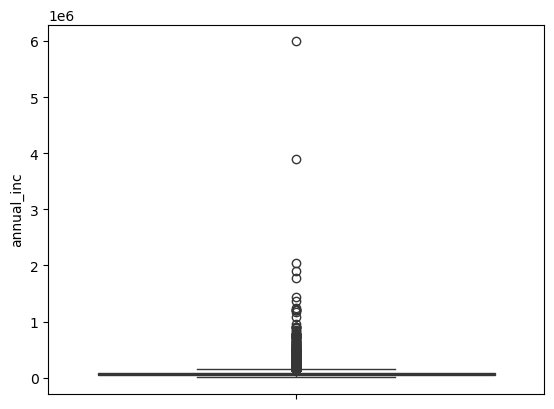

In [492]:
sns.boxplot(loan_df["annual_inc"])
plt.show()

In [493]:
per_95_annual_inc = loan_df["annual_inc"].quantile(0.95)
loan_df = loan_df[loan_df.annual_inc <= per_95_annual_inc]

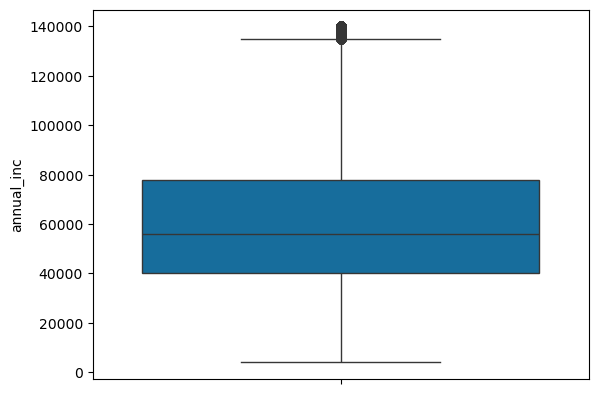

In [494]:
sns.boxplot(loan_df["annual_inc"])
plt.show()

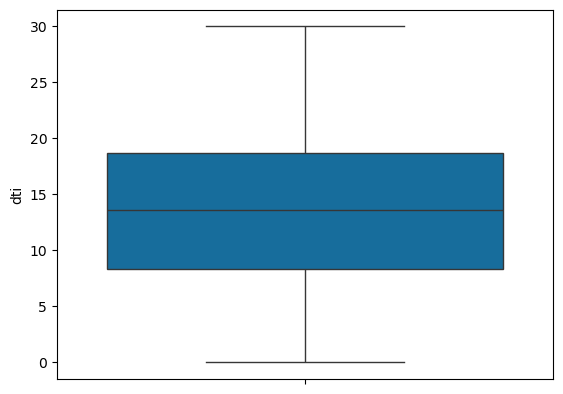

In [495]:
sns.boxplot(loan_df["dti"])
plt.show()

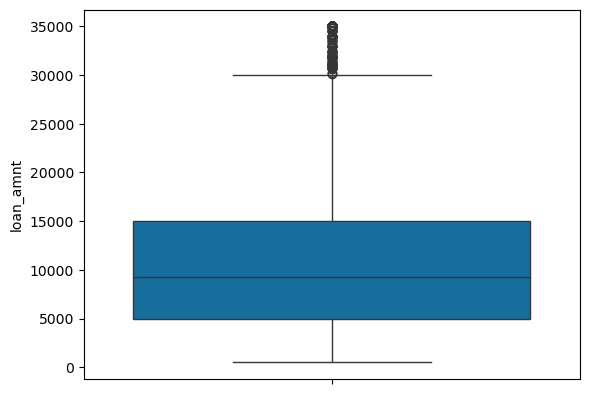

In [496]:
sns.boxplot(loan_df["loan_amnt"])
plt.show()

- In both "dti" & "loan_amnt" columns, we see few outliers but distribution look continuous so we won't need to remove outliers

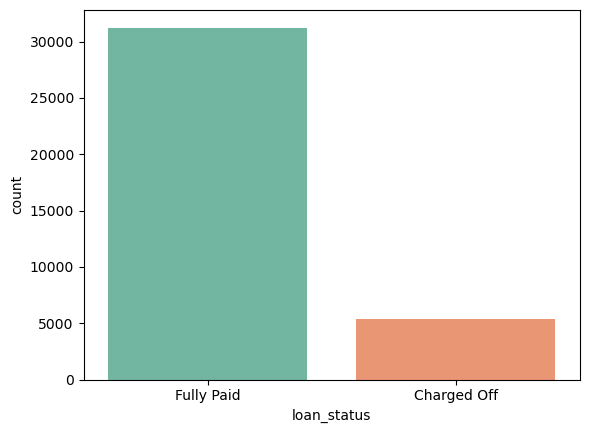

In [498]:
sns.countplot(x = "loan_status", data = loan_df, palette="Set2")
plt.show()

In [705]:
# Creating bins for int_rate, open_acc, total_acc
loan_df["int_rate_groups"] = pd.cut(loan_df["int_rate"], bins=4, labels=["5%-10%", "10%-15%", "15%-20%", "20%-25%"])
loan_df["open_acc_groups"] = pd.cut(loan_df["open_acc"], bins=5, labels=["2-10", "10-20", "20-30", "30-40", "40-50"])
loan_df["total_acc_groups"] = pd.cut(loan_df["total_acc"], bins=5, labels=["2-20", "20-40", "40-60", "60-80", "80-100"])
loan_df["annual_inc_groups"] = pd.cut(loan_df["annual_inc"], bins=5, labels=["3k-30k", "30k-60k", "60k-90k", "90k-120k", "120k-140k"])

In [706]:
loan_df["loan_amnt_groups"] = pd.cut(loan_df["loan_amnt"], bins=7, labels=["0-5k", "5k-10k", "10k-15k", "15k-20k", "20k-25k", "25k-30k", "30k-35k"])
loan_df["dti_groups"] = pd.cut(loan_df["dti"], bins=6, labels=["0-5", "5-10", "10-15", "15-20", "20-25", "25-30"])

# Univariate Analysis

- We'll be analysing only the defaulter data in univariate analysis. So creating a new dataframe with 

In [709]:
defaulter_df = loan_df[loan_df["loan_status"] == 'Charged Off']

In [710]:
num_colors = 50
random_palette = sns.color_palette(np.random.rand(num_colors, 3))

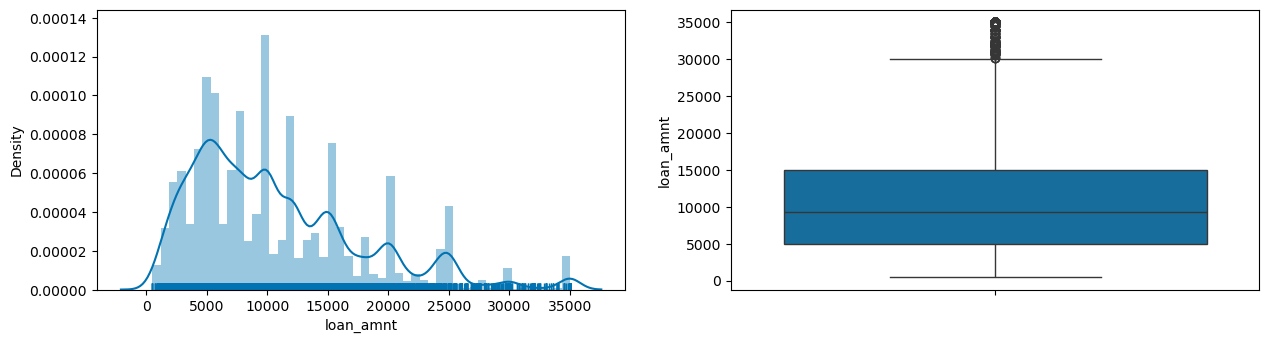

In [814]:
plt.figure(figsize=(15,8))

# subplot 1
plt.subplot(2, 2, 1)
sns.distplot(loan_df['loan_amnt'],rug = True)

# subplot 2
plt.subplot(2, 2, 2)
sns.boxplot(y=loan_df['loan_amnt'])

plt.show()

#### Loan amount Insight
- Plotting shows us that most of the loan amounts are in the range of 5000-15000

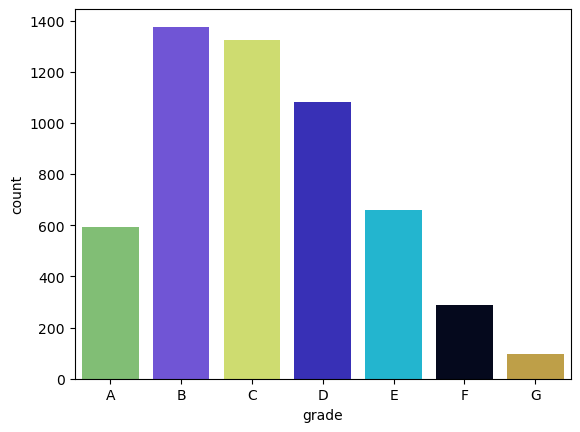

In [713]:
# Extract grades from the df to create ordered countplot
grade_list = list(defaulter_df["grade"].value_counts().index.sort_values())

# Creating countplot for grade column where loan status is charged off
sns.countplot(x = "grade", data = defaulter_df, order = grade_list, palette=random_palette)
plt.show()

#### Grade Insight
- Looks like grades B & C have the highest number of defaulters amongst the dataset. Grade B being the highest of all

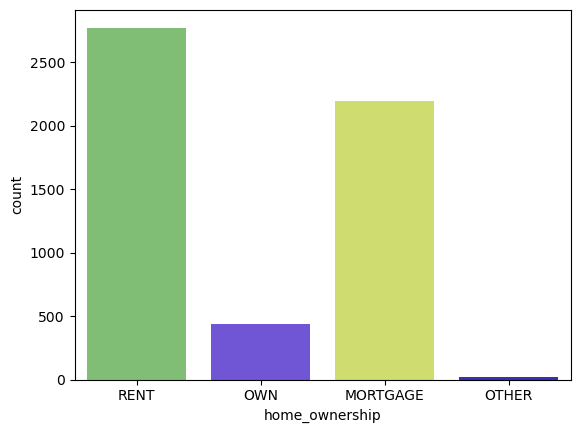

In [715]:
# Creating a countplot for home ownership
sns.countplot(x='home_ownership', data=defaulter_df, palette=random_palette)
plt.show()

#### Home ownership Insight
- People renting homes have the highest number of defaulters

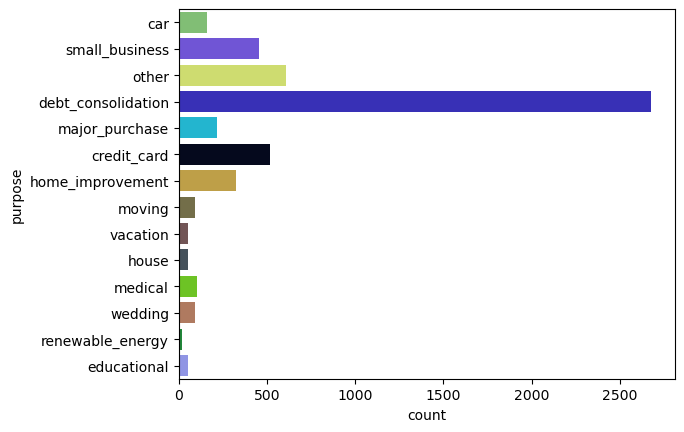

In [717]:
# Plotting purpose
sns.countplot(y ="purpose", data=defaulter_df, palette=random_palette)
plt.show()

#### Loan purpose Insight
- The dataset reveals that a significantly higher number of people are borrowing money for debt consolidation compared to other purposes

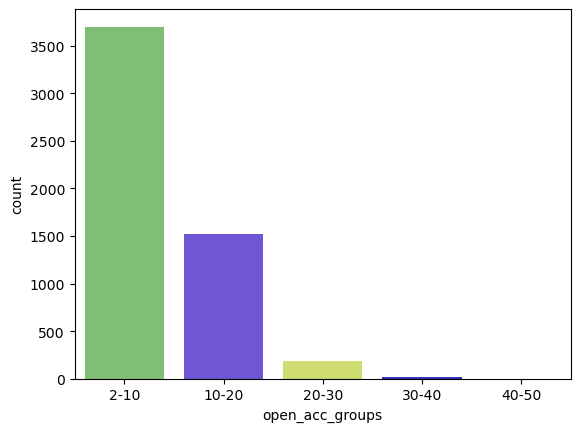

In [719]:
sns.countplot(x="open_acc_groups", data=defaulter_df, palette=random_palette)
plt.show()

#### Open Accounts Insight
- People with 2-10 open accounts are more likely to default on their loan

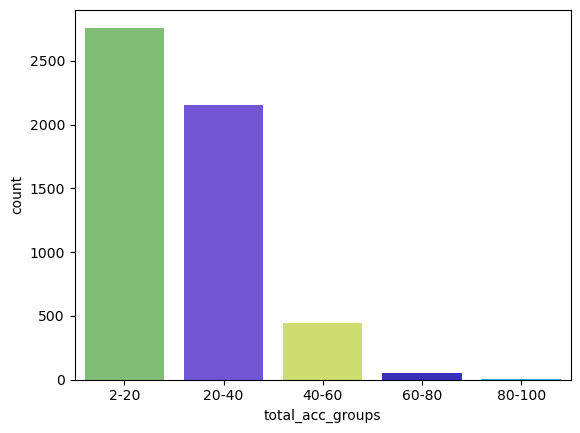

In [721]:
sns.countplot(x="total_acc_groups", data=defaulter_df, palette=random_palette)
plt.show()

#### Total Accounts Insight
- People with 2-20 total accounts are more likely to default on their loan

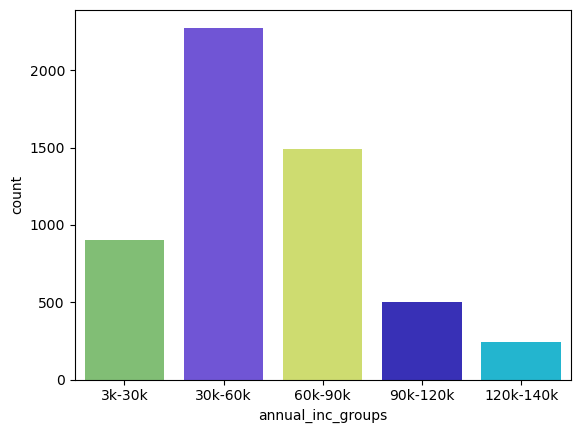

In [723]:
sns.countplot(x="annual_inc_groups", data=defaulter_df, palette=random_palette)
plt.show()

#### Annual Income Insight
- People with annual income between 30-60k seems to be having most number of dafaulters

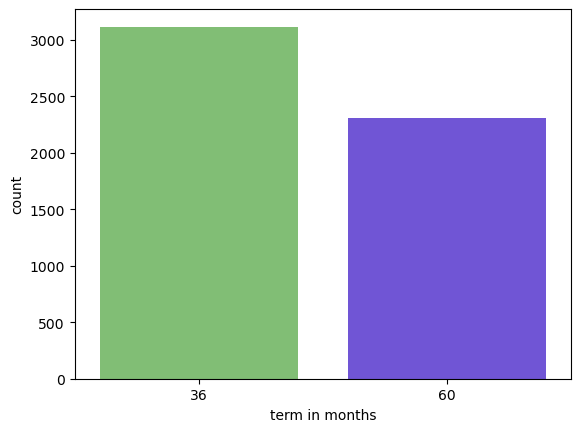

In [725]:
term_plot = sns.countplot(x="term", data=defaulter_df, palette=random_palette)
term_plot.set_xlabel("term in months")
plt.show()

#### Loan term Insight
- Surprisingly people with short term loans are defaulting more than people with long term loans

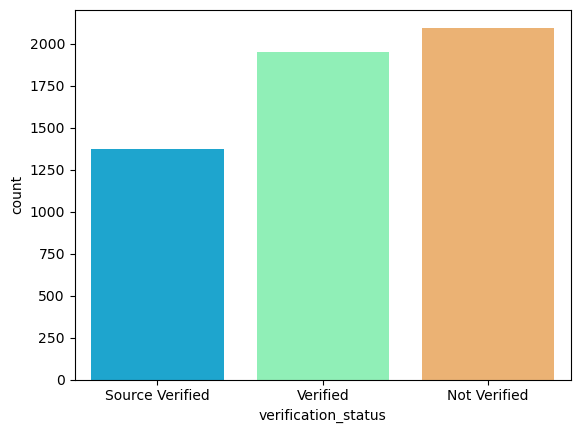

In [727]:
sns.countplot(x="verification_status", data=defaulter_df, palette='rainbow')
plt.show()

#### Income verification insight
- People whose income is not verified are defauling more than the verified ones.
- Lenders need to have strick income verification policies to reduce such applications.

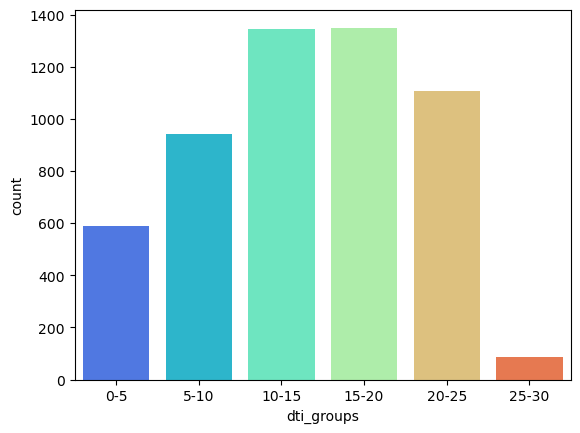

In [729]:
sns.countplot(x="dti_groups", data=defaulter_df, palette='rainbow')
plt.show()

#### DTI Insights
- DTI ranging from 10-20 is the highest amongst the dataset. Such people are more likely to default than rest

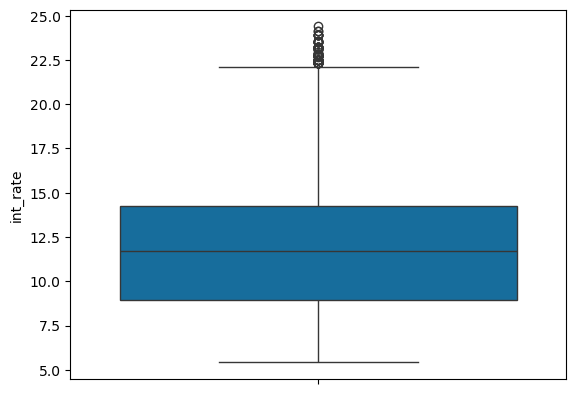

In [786]:
sns.boxplot(y=loan_df['int_rate'])
plt.show()

Text(0.5, 0, 'Interest Rate')

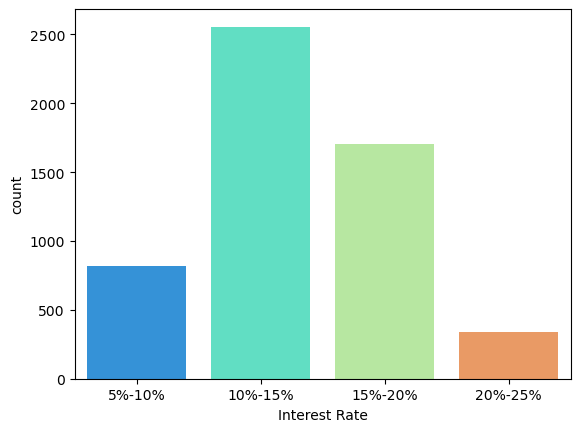

In [788]:
sns.countplot(x="int_rate_groups", data=defaulter_df, palette='rainbow')
plt.xlabel("Interest Rate")

#### Interest Rate Insight
- Interest rates between 10-15% seems to have highest number of defaulters. Need to compare this with other features to get further insights

### Analysis Insights

## Bivariate Analysis

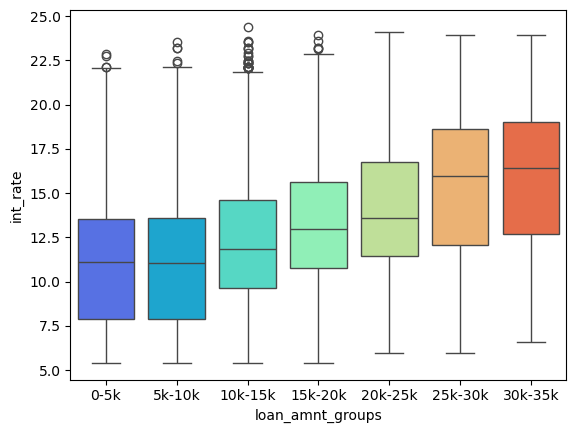

In [799]:
sns.boxplot(y='int_rate', x='loan_amnt_groups', data =loan_df,palette='rainbow')
plt.show()

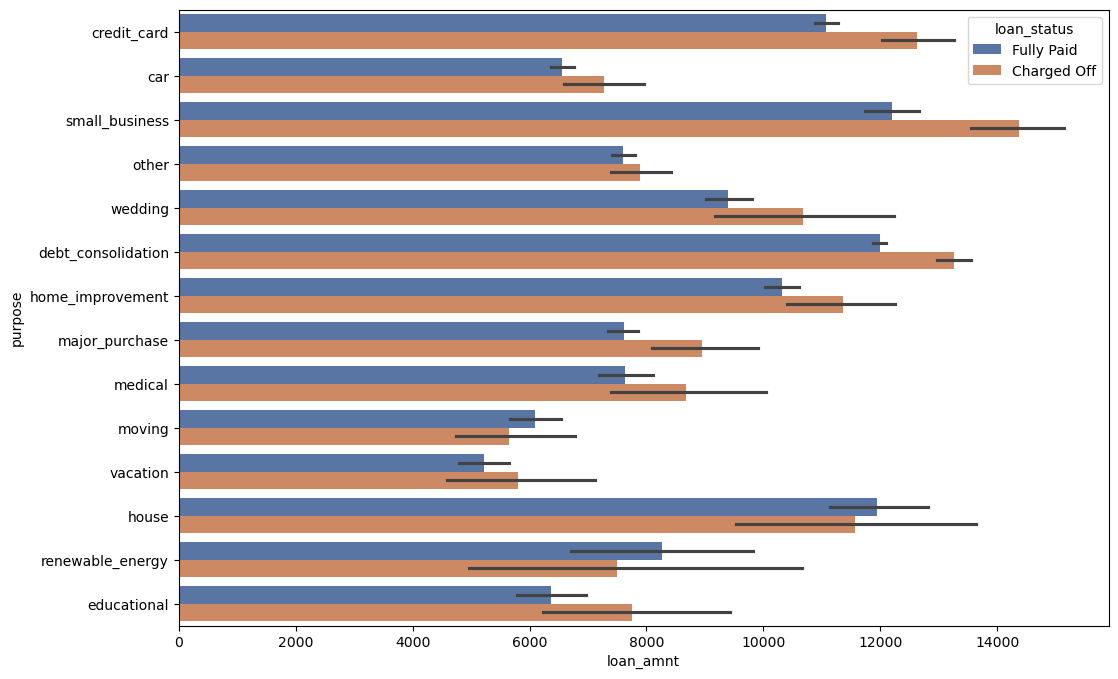

In [736]:
plt.figure(figsize=(12,8))
sns.barplot(data =loan_df,x="loan_amnt", y="purpose", hue ="loan_status",palette="deep")
plt.show()

#### Purpose vs Loan Amount Insight
- Comparing purpose with loan amounts tell us that small businesses tend to have high risk as they have higher default rates along with higher loan amounts.
- This overturns our initial assumption of debt_consolidation being the highest defaulter purpose.

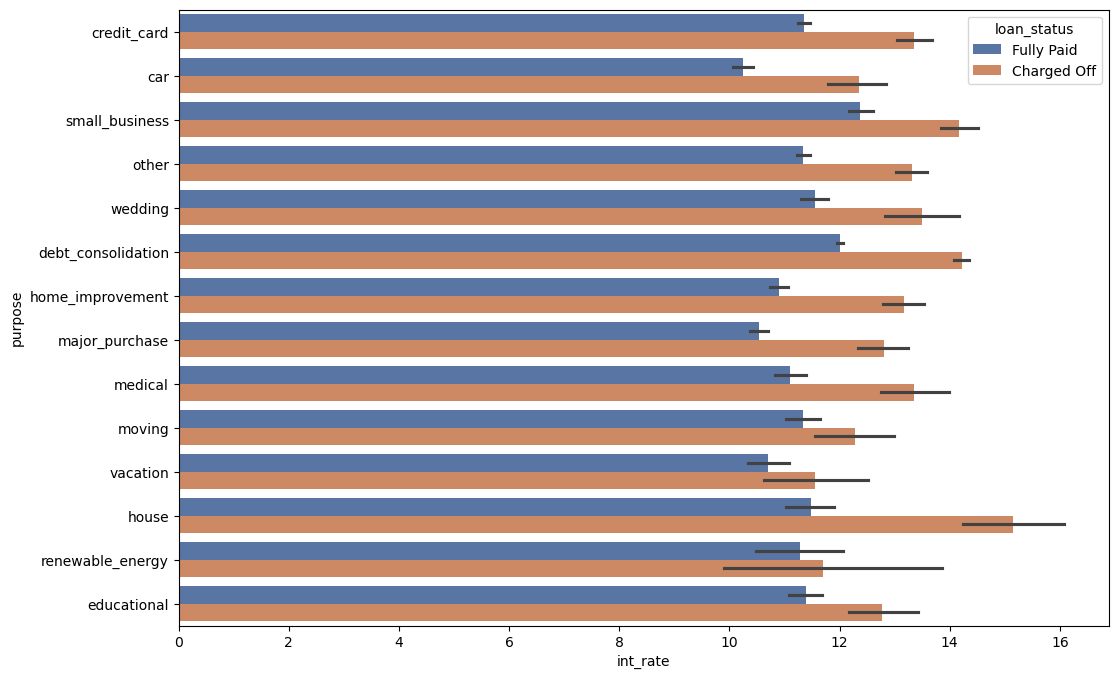

In [791]:
plt.figure(figsize=(12,8))
sns.barplot(data =loan_df,x="int_rate", y="purpose", hue ="loan_status",palette="deep")
plt.show()

- Interst rate compared with purpose shows pretty even distribution

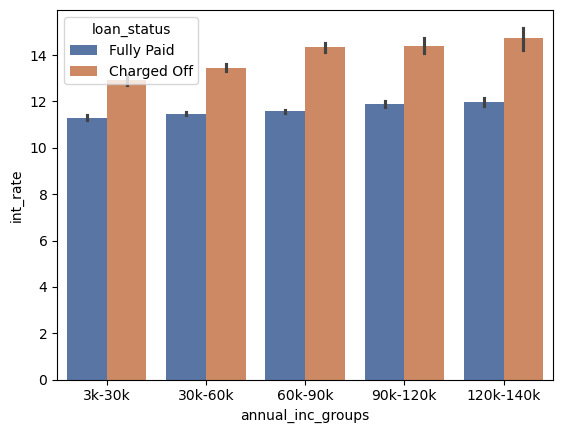

In [823]:
sns.barplot(data =loan_df,x="annual_inc_groups", y="int_rate", hue ="loan_status",palette="deep")
plt.show()

#### Annual income vs interest rate Insights
- Distribution seems pretty even across all bins

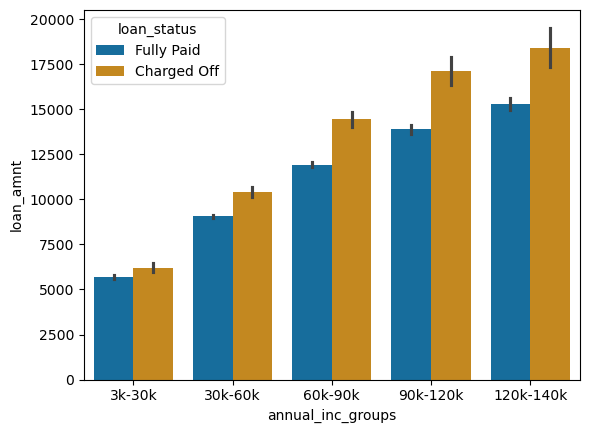

In [825]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan_df)
plt.show()

#### Annual income vs loan_amount Insight
- As annual income is increasing, loan amount is also increasing. Making it riskier as defaulter loan amount is also high

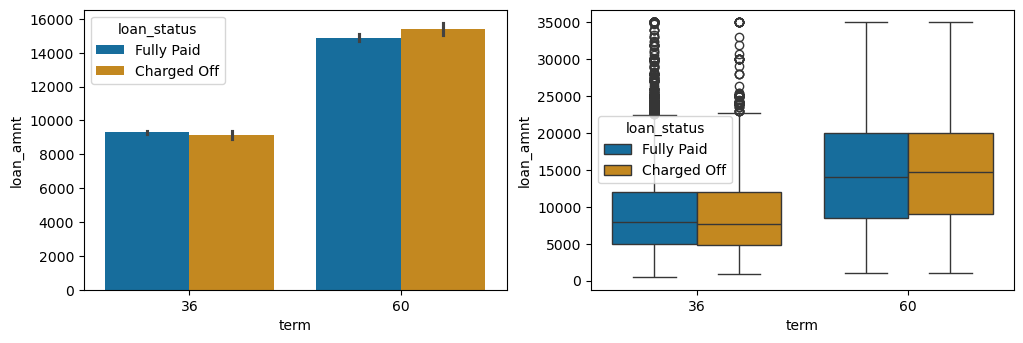

In [819]:
plt.figure(figsize=(12,8))
# Subplot 1
plt.subplot(2, 2, 1)
sns.barplot(x="term", y="loan_amnt", hue="loan_status", data=loan_df)

#Subplot 2
plt.subplot(2, 2, 2)
sns.boxplot(x="term", y="loan_amnt", hue="loan_status", data=loan_df)

plt.show()

#### term vs loan amount insights
- Loans with 60 month term have higher average loan amount than 36 month. Which makes it more risky

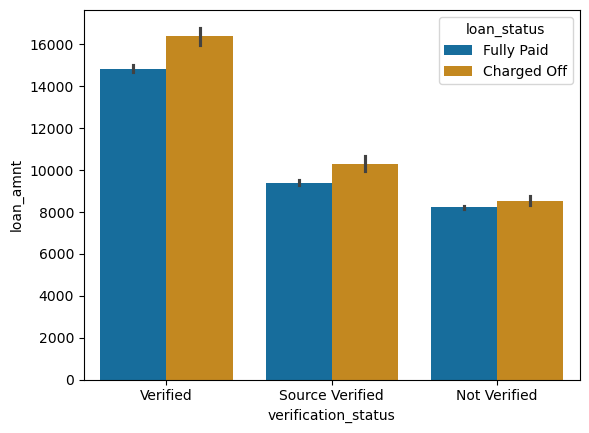

In [742]:
sns.barplot(x="verification_status", y="loan_amnt", hue="loan_status", data=loan_df, estimator=np.mean)
plt.show()

#### Verification vs loan amount Insight
- Even though not verified had higher number of defaulters, it is clear here that avergae loan amount is higher from verified people. This shows strong indication of loans being approved with loose verification methods.